# Data fields
* ID - an ID for this instance
* Area - (A), The area of a bean zone and the number of pixels within its boundaries.
* Perimeter - (P), Bean circumference is defined as the length of its border.
* MajorAxisLength - (L), The distance between the ends of the longest line that can be drawn from a bean.
* MinorAxisLength - (l), The longest line that can be drawn from the bean while standing perpendicular to the main axis.
* AspectRatio - (K), Defines the relationship between L and l.
* Eccentricity - (Ec), Eccentricity of the ellipse having the same moments as the region.
* ConvexArea - (C), Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
* EquivDiameter - (Ed), The diameter of a circle having the same area as a bean seed area.
* Extent - (Ex), The ratio of the pixels in the bounding box to the bean area.
* Solidity - (S), Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
* Roundness - (R), Calculated with the following formula: (4piA)/(P^2)
* Compactness - (CO), Measures the roundness of an object: Ed/L
* ShapeFactor1 - (SF1)
* ShapeFactor2 - (SF2)
* ShapeFactor3 - (SF3)
* ShapeFactor4 - (SF4)
* y - the class of the bean. It can be any of BARBUNYA, SIRA, HOROZ, DERMASON, CALI, BOMBAY, and SEKER.

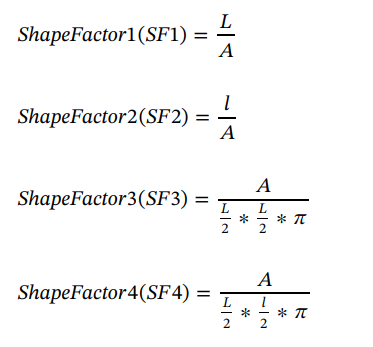

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#model selction tools
from sklearn.model_selection import train_test_split , GridSearchCV\
        , StratifiedKFold , TimeSeriesSplit,KFold,cross_val_score
#metrics 
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error
#models 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import catboost as cb
#tools
from sklearn.inspection import permutation_importance
from sklearn.utils import shuffle
from sklearn.pipeline import FeatureUnion, Pipeline, make_pipeline

In [2]:
#---------- configs
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
%matplotlib inline

# 1-EDA (Exploratory Data Analysis)

## Reading the Data

In [3]:
#Dataset Paths
train_path = r"../input/dry-beans-classification-iti-ai-pro-intake01/train.csv"
test_path = r"../input/dry-beans-classification-iti-ai-pro-intake01/test.csv"
#Load Train Dataset
df = pd.read_csv(train_path,index_col='ID')
print("Shape:",df.shape)
df.head()

Shape: (10834, 17)


Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
ID                                                                     
0   58238    971.303       397.202654       186.945510      2.124697   
1   44515    757.601       265.590470       213.967453      1.241266   
2   31662    653.783       239.902428       168.421505      1.424417   
3   38778    734.020       268.446281       184.061923      1.458456   
4   42530    775.403       281.212824       193.236878      1.455275   

    Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
ID                                                                           
0       0.882317       58977     272.306674  0.604756  0.987470   0.775723   
1       0.592420       44780     238.071960  0.771745  0.994082   0.974620   
2       0.712136       32034     200.781748  0.801407  0.988387   0.930853   
3       0.727925       39208     222.201897  0.766137  0.989033   0.904439   
4       0.726511       43028     232.703412  0.729816  0.988426   0.888895   

    Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
ID                                                                        
0      0.685561      0.006820      0.000929      0.469994      0.998595   
1      0.896387      0.005966      0.002376      0.803510      0.997370   
2      0.836931      0.007577      0.002293      0.700453      0.997737   
3      0.827733      0.006923      0.002005      0.685142      0.999250   
4      0.827499      0.006612      0.001912      0.684755      0.996507   

           y  
ID            
0      HOROZ  
1      SEKER  
2   DERMASON  
3   DERMASON  
4       SIRA

## Get information about Non-Null values & Dtype of columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10833
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10834 non-null  int64  
 1   Perimeter        10834 non-null  float64
 2   MajorAxisLength  10834 non-null  float64
 3   MinorAxisLength  10834 non-null  float64
 4   AspectRation     10834 non-null  float64
 5   Eccentricity     10834 non-null  float64
 6   ConvexArea       10834 non-null  int64  
 7   EquivDiameter    10834 non-null  float64
 8   Extent           10834 non-null  float64
 9   Solidity         10834 non-null  float64
 10  roundness        10834 non-null  float64
 11  Compactness      10834 non-null  float64
 12  ShapeFactor1     10834 non-null  float64
 13  ShapeFactor2     10834 non-null  float64
 14  ShapeFactor3     10834 non-null  float64
 15  ShapeFactor4     10834 non-null  float64
 16  y                10834 non-null  object 
dtypes: float64(1

## Get statistical info(mean,std,min,max,etc..)

In [5]:
df.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   10834.000000  10834.000000     10834.000000     10834.000000   
mean    53095.675189    855.274892       320.036169       202.410342   
std     29542.542580    214.991122        85.961630        45.113965   
min     20420.000000    524.932000       183.601165       129.576207   
25%     36343.500000    703.601250       253.501071       175.927024   
50%     44645.000000    793.739500       296.377365       192.525040   
75%     61295.000000    975.517500       376.068399       217.315195   
max    254616.000000   1985.370000       738.860153       450.926187   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  10834.000000  10834.000000   10834.000000   10834.000000  10834.000000   
mean       1.581294      0.750588   53816.205926     253.123583      0.749937   
std        0.244314      0.091481   29999.710739      59.433080      0.048949   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432985      0.716250   36731.250000     215.113880      0.718778   
50%        1.550761      0.764314   45148.000000     238.419335      0.760141   
75%        1.703029      0.809450   62251.500000     279.362162      0.786871   
max        2.388873      0.908167  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  10834.000000  10834.000000  10834.000000  10834.000000  10834.000000   
mean       0.987152      0.873647      0.800244      0.006559      0.001718   
std        0.004626      0.059344      0.061228      0.001127      0.000593   
min        0.919246      0.489618      0.645368      0.002856      0.000564   
25%        0.985627      0.833479      0.763378      0.005888      0.001161   
50%        0.988290      0.883472      0.801428      0.006643      0.001700   
75%        0.990014      0.916883      0.834068      0.007268      0.002169   
max        0.994677      0.990685      0.987303      0.009897      0.003665   

       ShapeFactor3  ShapeFactor4  
count  10834.000000  10834.000000  
mean       0.644139      0.995083  
std        0.098268      0.004306  
min        0.416499      0.947687  
25%        0.582747      0.993690  
50%        0.642287      0.996397  
75%        0.695670      0.997895  
max        0.974767      0.999733

## Check for Missing Values

In [6]:
df.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
y                  0
dtype: int64

There is no missing values in the dataset

## Check for Number of Unique Values

In [7]:
df.nunique()

Area                9794
Perimeter          10748
MajorAxisLength    10834
MinorAxisLength    10834
AspectRation       10834
Eccentricity       10834
ConvexArea          9908
EquivDiameter       9794
Extent             10830
Solidity           10824
roundness          10834
Compactness        10834
ShapeFactor1       10834
ShapeFactor2       10834
ShapeFactor3       10834
ShapeFactor4       10834
y                      7
dtype: int64

In [8]:
# #Drop Unused columns
# df.drop(columns=['ID'],inplace=True)

In [9]:
#Factorize classes of the bean
df['y_factorized'],_ = pd.factorize(df['y'],sort = True)
df

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
ID                                                                        
0      58238    971.303       397.202654       186.945510      2.124697   
1      44515    757.601       265.590470       213.967453      1.241266   
2      31662    653.783       239.902428       168.421505      1.424417   
3      38778    734.020       268.446281       184.061923      1.458456   
4      42530    775.403       281.212824       193.236878      1.455275   
...      ...        ...              ...              ...           ...   
10829  37777    716.007       250.174662       192.704033      1.298233   
10830  32187    667.621       247.778775       165.786862      1.494562   
10831  81837   1095.937       433.838186       241.527026      1.796230   
10832  48212    826.362       309.639462       199.285811      1.553746   
10833  28026    610.943       215.446569       165.740377      1.299904   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
ID                                                                              
0          0.882317       58977     272.306674  0.604756  0.987470   0.775723   
1          0.592420       44780     238.071960  0.771745  0.994082   0.974620   
2          0.712136       32034     200.781748  0.801407  0.988387   0.930853   
3          0.727925       39208     222.201897  0.766137  0.989033   0.904439   
4          0.726511       43028     232.703412  0.729816  0.988426   0.888895   
...             ...         ...            ...       ...       ...        ...   
10829      0.637708       38174     219.315230  0.770519  0.989600   0.925983   
10830      0.743179       32582     202.439525  0.731805  0.987877   0.907466   
10831      0.830699       82554     322.797312  0.771996  0.991315   0.856226   
10832      0.765357       48777     247.760822  0.677002  0.988417   0.887206   
10833      0.638903       28302     188.901592  0.776688  0.990248   0.943560   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
ID                                                                           
0         0.685561      0.006820      0.000929      0.469994      0.998595   
1         0.896387      0.005966      0.002376      0.803510      0.997370   
2         0.836931      0.007577      0.002293      0.700453      0.997737   
3         0.827733      0.006923      0.002005      0.685142      0.999250   
4         0.827499      0.006612      0.001912      0.684755      0.996507   
...            ...           ...           ...           ...           ...   
10829     0.876648      0.006622      0.002413      0.768513      0.997708   
10830     0.817017      0.007698      0.002116      0.667517      0.997646   
10831     0.744050      0.005301      0.001002      0.553610      0.994412   
10832     0.800159      0.006422      0.001624      0.640255      0.994793   
10833     0.876791      0.007687      0.002802      0.768762      0.999317   

              y  y_factorized  
ID                             
0         HOROZ             4  
1         SEKER             5  
2      DERMASON             3  
3      DERMASON             3  
4          SIRA             6  
...         ...           ...  
10829     SEKER             5  
10830  DERMASON             3  
10831      CALI             2  
10832      SIRA             6  
10833  DERMASON             3  

[10834 rows x 18 columns]

## Visualization

### Check for Balancing in dataset

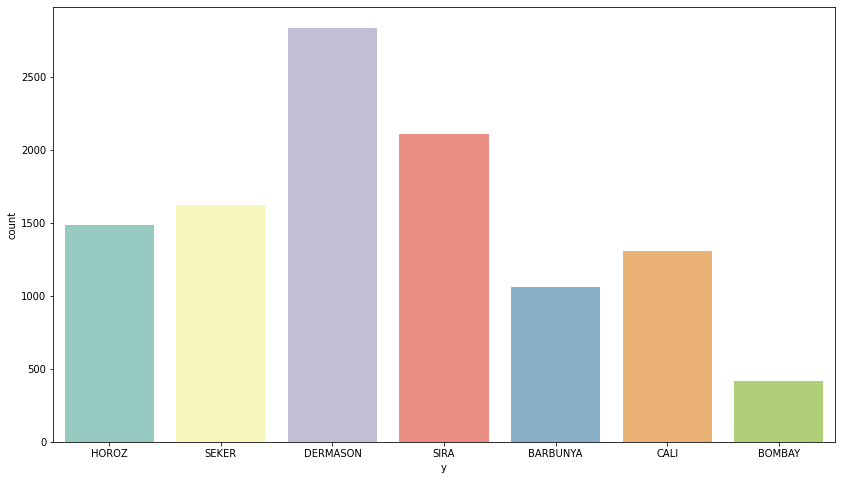

In [10]:
plt.figure(figsize=(14,8))
sns.countplot(x="y", data=df, palette="Set3")
plt.show()

The dataset is imbalanced

# Univariate Analysis

In [11]:
def plot_boxenplots(df,x_cols=[],rows = 2,cell_size = 4):
    size = len(x_cols)
    cols = size // rows
    fig,axes = plt.subplots(rows,cols,figsize=(cols * cell_size, cols * cell_size),sharey=True)
    fig.suptitle("Distributions")
    for i,axe in enumerate(axes.flatten()):
        if(i < size):
            sns.boxenplot(data = df,x=x_cols[i],y='y',palette='Set2',ax=axe)
        else:
            print('subplots > n of columns, change n of rows')
            break 
        axe.set_title(x_cols[i])
    
    plt.tight_layout()

    plt.show()

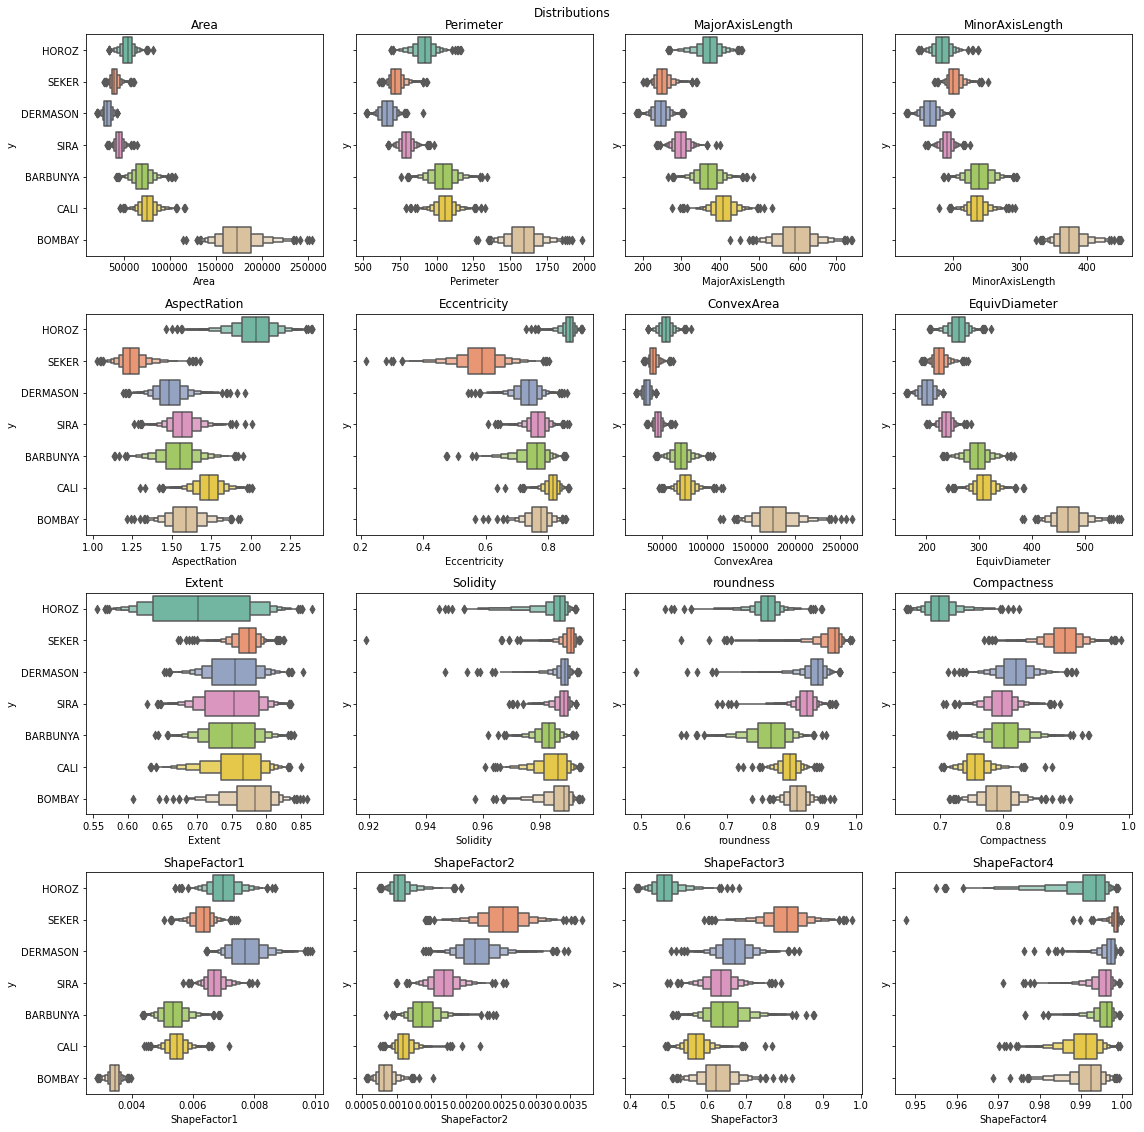

In [12]:
plot_boxenplots(df,df.iloc[:,:-2].columns,rows = 4,cell_size =4)

#### mostly skewed multi-modal distributions with possible big percentage of outliers.

In [13]:
def plot_distribution(df,x_cols=[],rows = 2,cell_size = 4):
    size = len(x_cols)
    cols = size // rows
    fig,axes = plt.subplots(rows,cols,figsize=(cols * cell_size, rows * cell_size))
    fig.suptitle("Variable Distribution",size= 'large')
    for i,axe in enumerate(axes.flatten()):
        if(i < size):
            sns.distplot(df[x_cols[i]],ax=axe,rug=True)
            median = df[x_cols[i]].median()
            axe.set_title(x_cols[i] + f' ,Median : {median:0.1f}',size= 'large')
            axe.axvline(median, color ='red',lw=2, alpha = 0.55)
        else:
            print('subplots > n of columns, change n of rows')
            break 
    plt.tight_layout()
    plt.show()

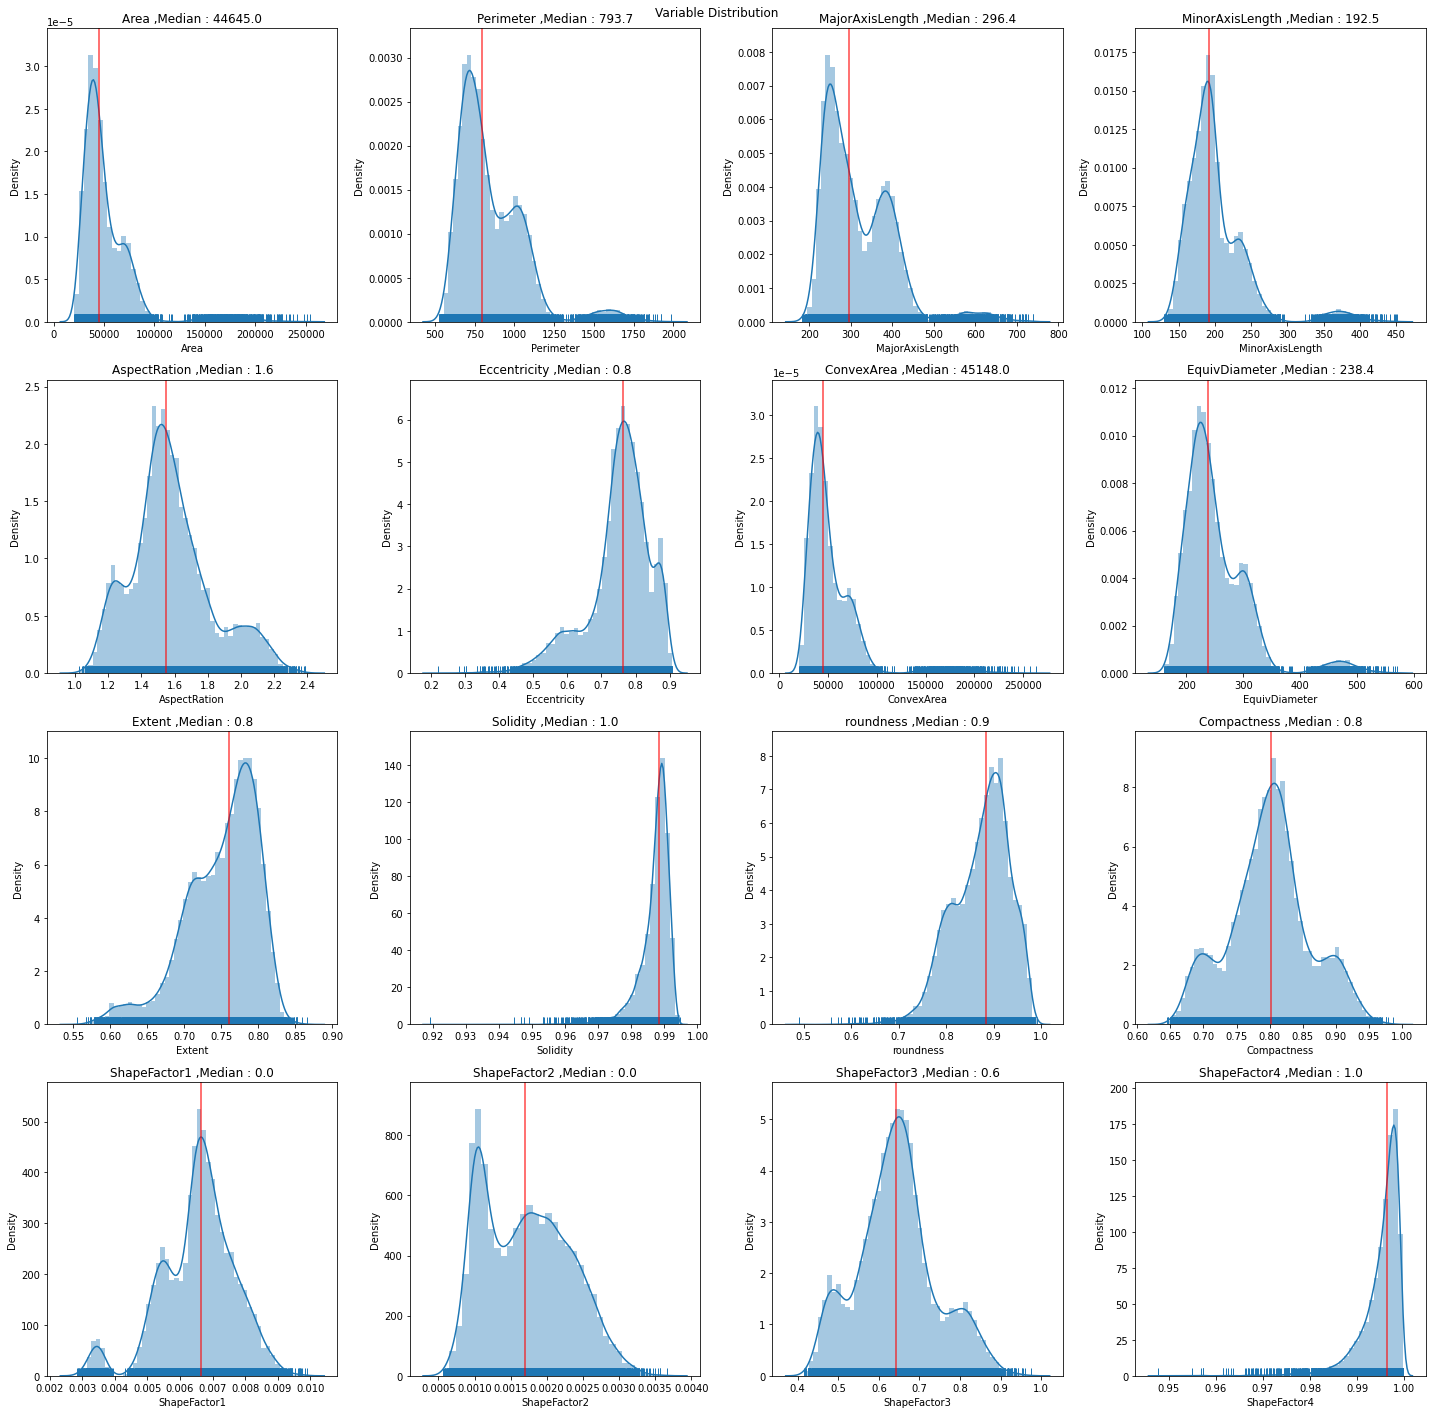

In [14]:
plot_distribution(df,df.iloc[:,:-2].columns,rows=4,cell_size=5)

## Notes on ('Area','Perimeter','MajorAxisLength', 'MinorAxisLength') Distributions : 
>* the 4 features share common informations
   >>* for each bean class , the Area and Perimeter has the same distinct distribution from the other classes.
   >>* for bombay beans has the largest [Area,Perimeter] , for the dermason has the smallest [Area,Perimeter].
   >>* Cali And Barbunya share semi equal distributions for the 4 features plotted above.
   
## Notes on ('AspectRation', 'Compactness', 'roundness', 'EquivDiameter') Distributions :

>* Aspect Ratio 
   >>* Give idea on the Length/width , for example from the visual images we expect the horoz to have the highest aspect ration and seker to be closer to ~1, and this is correct according to the distribution plot. (the rest share close to similar distributions).
   
>* Compactness
   >>*  Measures the roundness of an object by the following equation: ~ an equivalent circle diameter / Length
   >>*  Seker is the most compact meaning it's close to be a circle , on the contrary horoz is the least because the aspect ratio described above.
   >>*  Cali is in the lower end also due to its aspect ratio.
    
>* Roundness
   >>*  Measures the roundness of an object by the following equation: ~  (4pi * Area)/(perimeter^2)
   >>*  Seker is the most round followed by dermason ... only one problem here , the outliers, huge skewness.
   >>*  it's not obvious to me the validity of the equation used in the calculation where depending on pixel values for (area , perimeter) it can lead to misleading info depending on the bean orientation in the 3d space.
   
>* EquivDiameter
   >>*  The diameter of a circle having the same area as a bean seed area. 
   >>*  Has similar distribution characterstic to the area, perimeter, major and minor lengths.

## Notes on ('Eccentricity', 'ConvexArea', 'Extent','Solidity') Distributions : 

>* Eccentricity
   >>* Gives idea of how much the seed is elongated , ~e=1 means a very stretched(on length) seed, ~e=0 means a circular seed.
   
>* ConvexArea
   >>*  Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
   >>*  Similar to the Area Distribution.
    
>* Extent
   >>*  The ratio of the pixels in the bounding box to the bean area.
   >>* ~Extent = 1 , when the bean is squarish (filling the bounding box).
   >>* one note , the bimodal distributions , this is clear indication of the 3D orientation for example the horoz seed is the most -elongated- seed it has bimodal distribution due to the fact of different orientations will give different extent ratio .. on the contrary the seker seed is closer to a be circlular giving close to normal distrinution..
   >>* don't know how to benefit from this, to be investigated.
   
>* Solidity
   >>*  Also known as convexity. The ratio of the pixels in the convex shell to those found in beans
   >>*  doesn't give me clear variance between the classes. to be investigated later..
   
## Notes on ('ShapeFactor1', 'ShapeFactor2','ShapeFactor3', 'ShapeFactor4') Distributions : 

>* no details were given , maybe in the paper they have the reasoning behind the 4 features.
>* there is unique variance in the distributions for 'ShapeFactor1', 'ShapeFactor2'.
>* shape factor 3 is similar to shape factor 2 ,shape factor 4 has similar characteristics with Solidity attribute.

# Bivariate Analysis

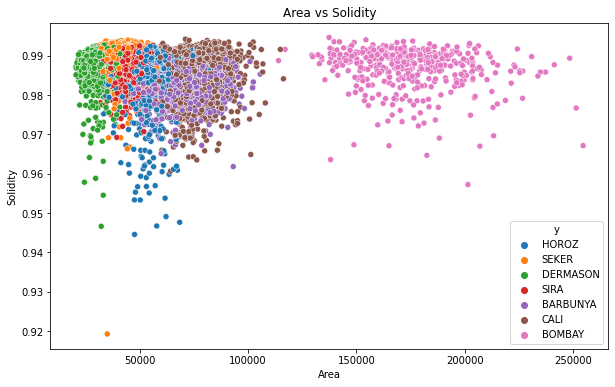

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Area" , y="Solidity" , hue="y" , data=df)
plt.title('Area vs Solidity')
plt.show()

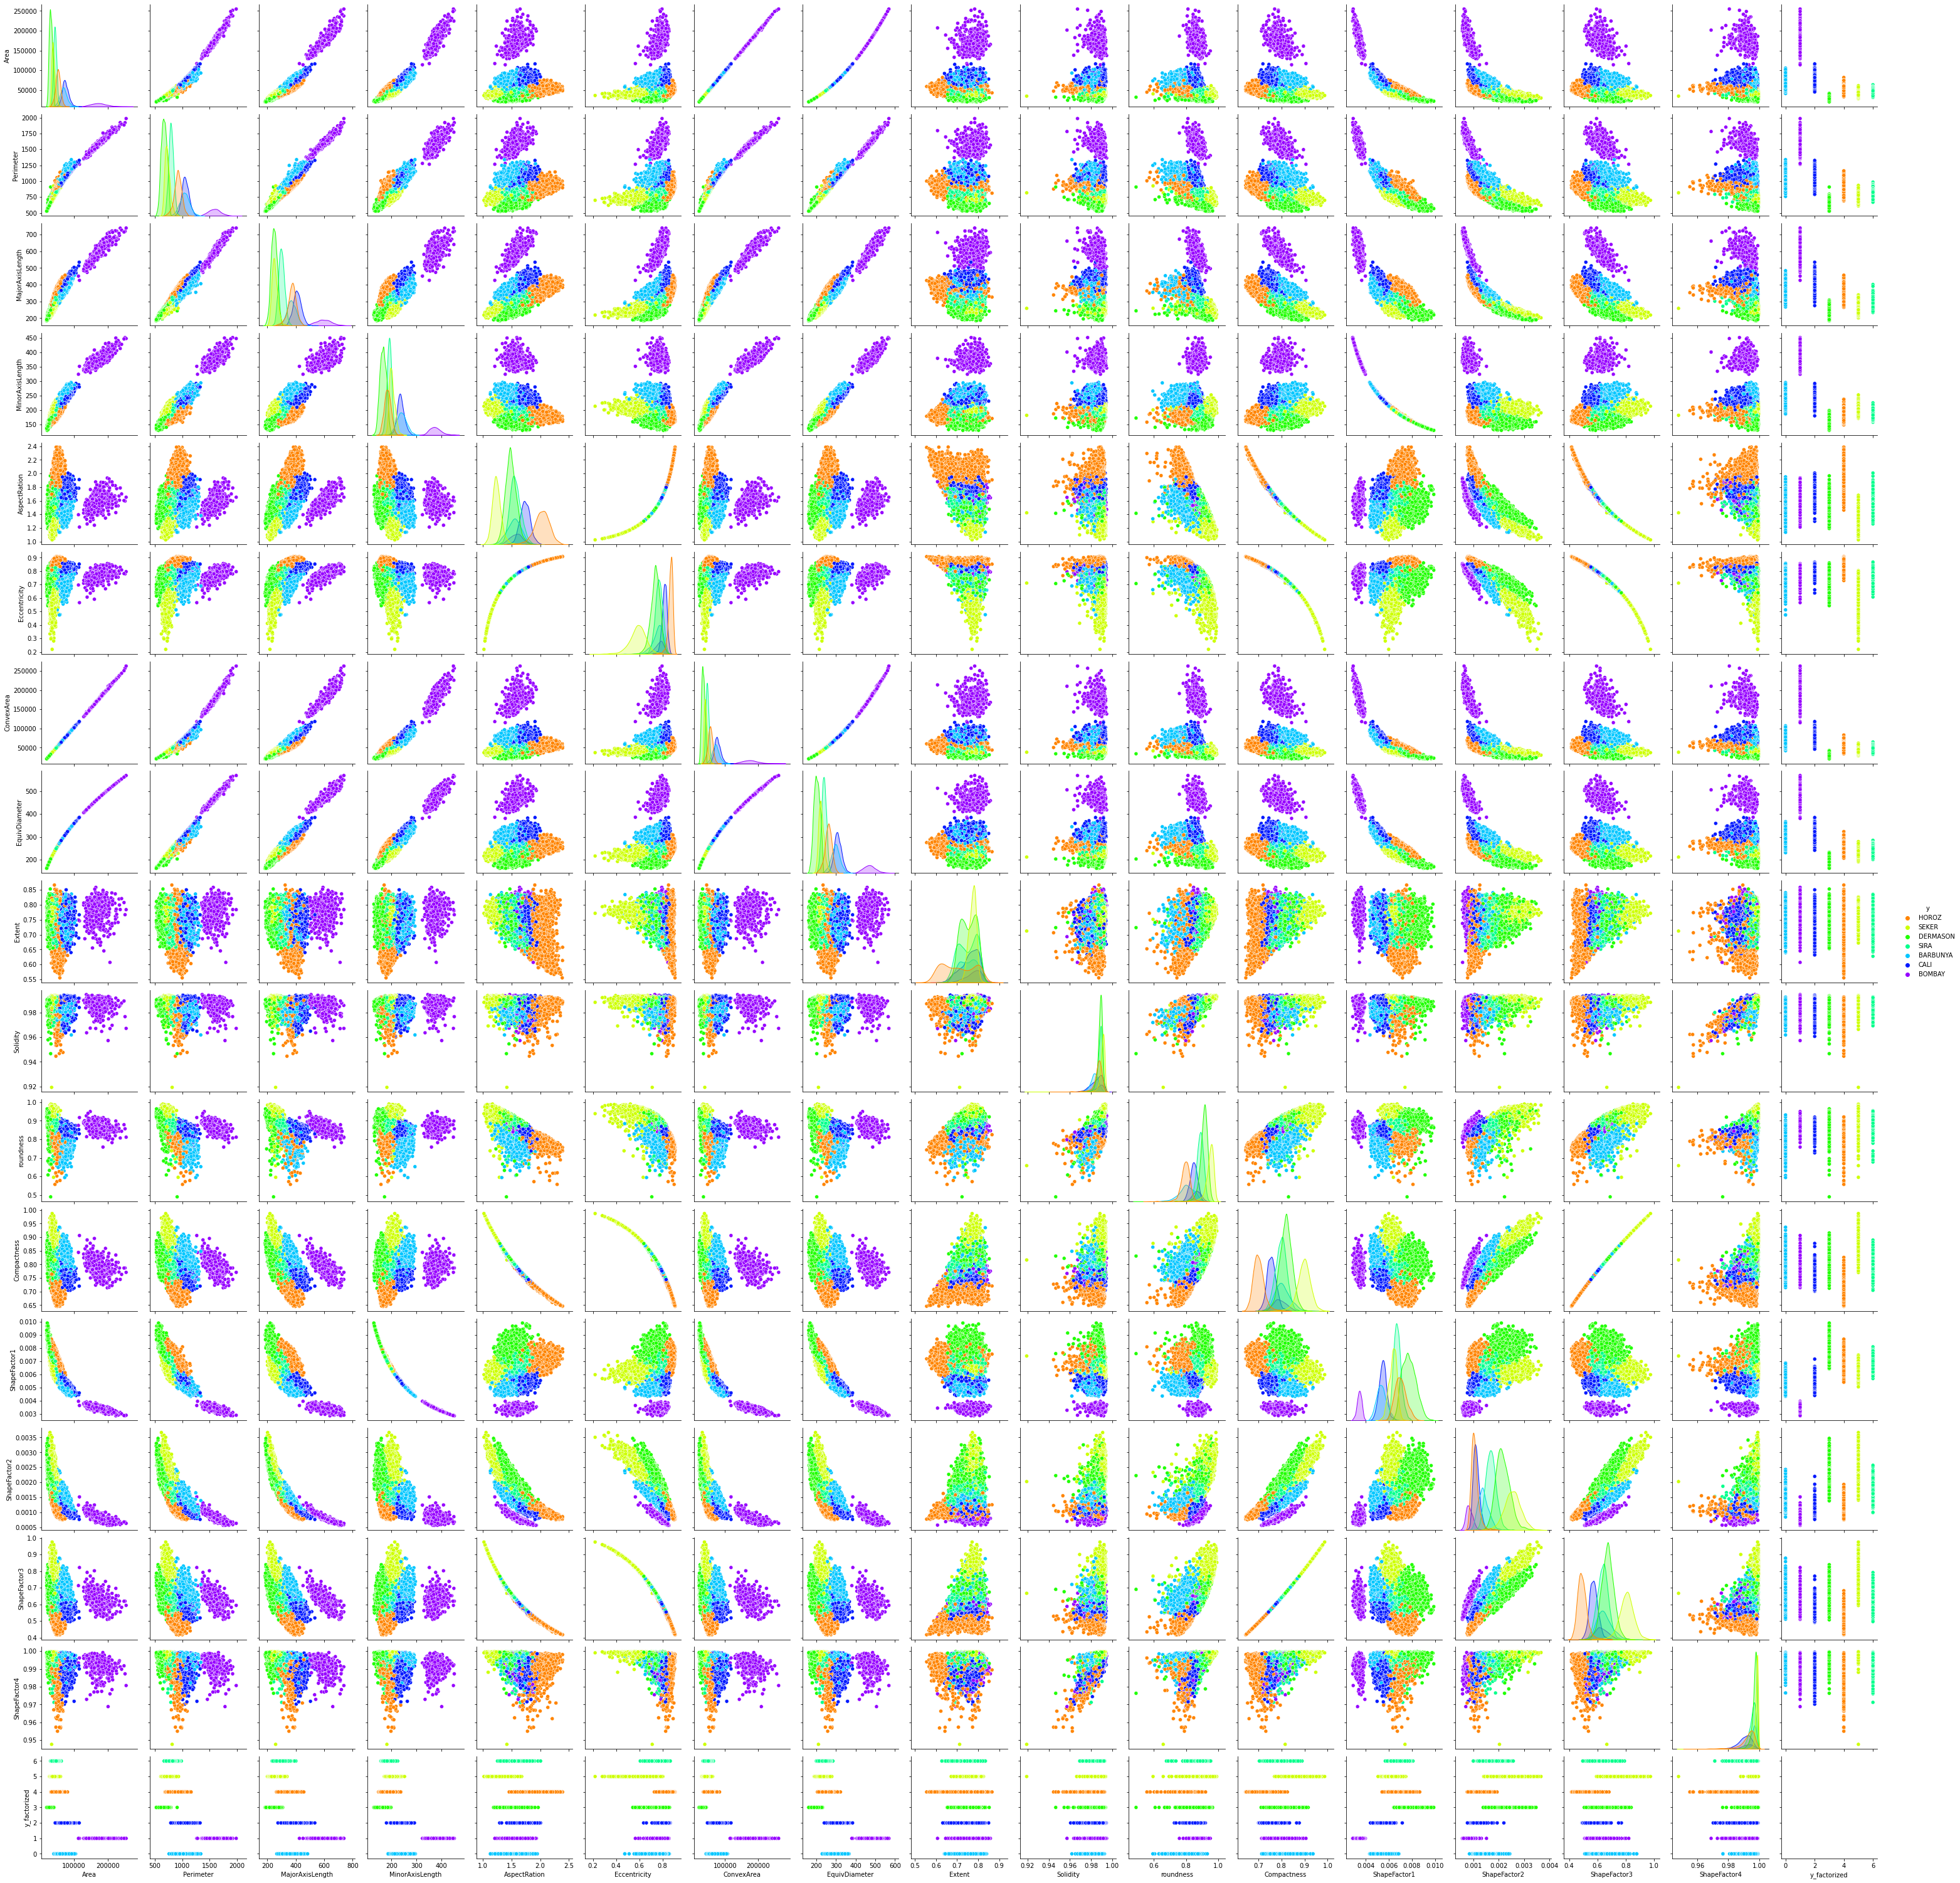

In [16]:
sns.pairplot(df, hue = 'y', palette='gist_rainbow')
plt.show()

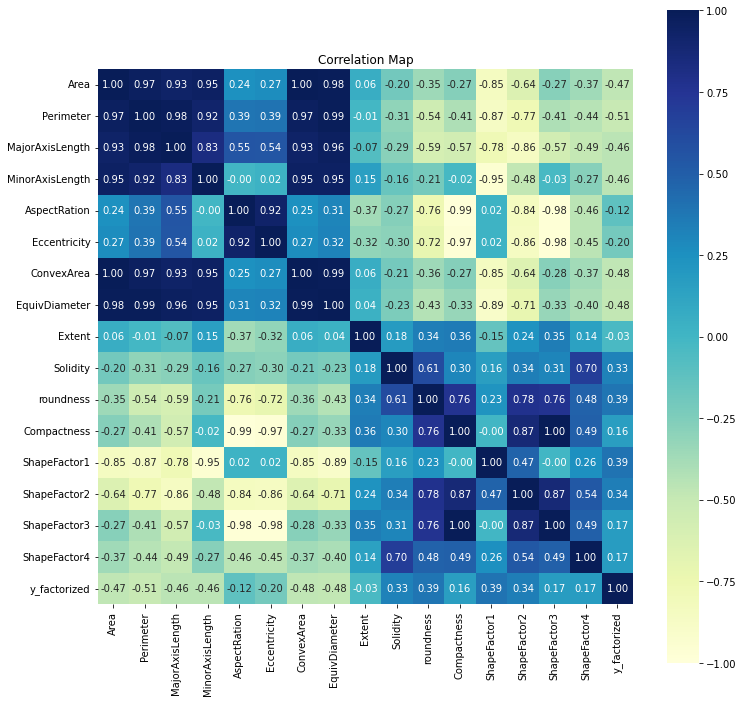

In [17]:
#Correlation Map
corrmatrix = df.corr()
fig,ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmatrix,annot=True,fmt='.2f',cmap='YlGnBu',vmin=-1,vmax=1, square=True,ax=ax)
plt.xticks(rotation=90)
plt.title('Correlation Map')
plt.show()

# Features

In [18]:
def DERM_SIRA(df):
    df["DERM_SIRA"] = ( (np.exp(df['ShapeFactor4']) + np.log(df['ShapeFactor1'].mean())) **2 ) + ( (np.log(df['ConvexArea'])) + np.log(df['Perimeter']))
    
def shape_cali(df):
    df['shape_cali'] = (df['MajorAxisLength']  ) - (df['ShapeFactor4'] ) 
def shape_barbunya(df):
    df['shape_barbunya'] = (df['MinorAxisLength']  ) - (df['ShapeFactor1'] ) 

    
def shape_sira(df):
    df["shape_sira"] = ((df['Solidity']**2) + (df['ShapeFactor1']**2) + df['Eccentricity']   ) - ((df['Extent']**2) + (df['ShapeFactor4']**2) + df['MinorAxisLength'])


def shape_dermason(df):
    df["shape_dermason"] = df['ShapeFactor1'] - (df['Area'] / 10000)
    
def shape_seker(df):
    df['shape_seker'] = (df['Compactness']  ) - (df['AspectRation'] )     


def shape_horoz(df):
    df['shape_horoz'] = (df['Eccentricity']) - (df['ShapeFactor3'] ) 
    
def shape_CALI(df):
    df["shape_CALI"] = 0.1 *( ((np.log(df['Area']))+(np.log(df['MajorAxisLength']))+df['AspectRation']+df['Eccentricity']+df['roundness']) - (df['Compactness']+df['ShapeFactor2']+df['ShapeFactor3']+ df['ShapeFactor4']) )
    
def shape_CALI_2(df):
    df["shape_CALI_2"] = ( df['AspectRation']+df['Eccentricity']) - (df['Compactness']+df['ShapeFactor2']+df['ShapeFactor3'] )
# print(df["shape_cali"] = df['Area']*df['MajorAxisLength']*df['AspectRation']*df['Eccentricity']*df['roundness'] / (df['Compactness']*df['ShapeFactor2']*df['ShapeFactor3'*, df['ShapeFactor4']))

def shape_sira_2(df):
    df["shape_sira_2"] = 1000* ((df['shape_sira']**2)    ) / ((df['ShapeFactor4']**2)  )

def log_feature(df):
    cols = df.drop(columns=['y']).columns
    for col in cols:
        df[col+'_log'] = np.log(df[col].mean())
        
def standariseMinMax(df):
    from sklearn.preprocessing import QuantileTransformer
    quantile = QuantileTransformer()
    from sklearn.preprocessing import PowerTransformer
    power = PowerTransformer(method = 'box-cox')
     #'' box-cox yeo-johnson
    from sklearn.preprocessing import RobustScaler
    robust = RobustScaler()
    from sklearn.preprocessing import MinMaxScaler
    minmax = MinMaxScaler()
        
    
    columns = [ 'Area' , 'ShapeFactor4', 'EquivDiameter', "ConvexArea","AspectRation",
       'Solidity', 'roundness',  'ShapeFactor1', 'ShapeFactor2',  'Perimeter','MajorAxisLength','MinorAxisLength'
              ,'Eccentricity','Extent','Solidity','Compactness', 'ShapeFactor3', 'ShapeFactor4']
    
    
    for col in columns:
#         df[col] =robust.fit_transform(df[col].to_numpy().reshape((df[col].shape[0],1)))
        df[col] =quantile.fit_transform(df[col].to_numpy().reshape((df[col].shape[0],1)))

        
    columns2 = ["shape_horoz","shape_seker","shape_dermason","shape_sira" ,"shape_barbunya","shape_cali"
               ,'shape_CALI', 'shape_CALI_2', 'shape_sira_2','DERM_SIRA']
    for col in columns2:
#         df[col] =robust.fit_transform(df[col].to_numpy().reshape((df[col].shape[0],1)))
        df[col] =quantile.fit_transform(df[col].to_numpy().reshape((df[col].shape[0],1)))

        

In [19]:
def processing(df):
    shape_horoz(df)
    shape_seker(df)
    shape_dermason(df)
    shape_sira(df)
    shape_barbunya(df)
    shape_cali(df)

    shape_CALI(df)
    shape_CALI_2(df)
    shape_sira_2(df)
    
    DERM_SIRA(df)
    standariseMinMax(df)
    
processing(df)


# df_ldaD , lda = to_lda_Train(df)

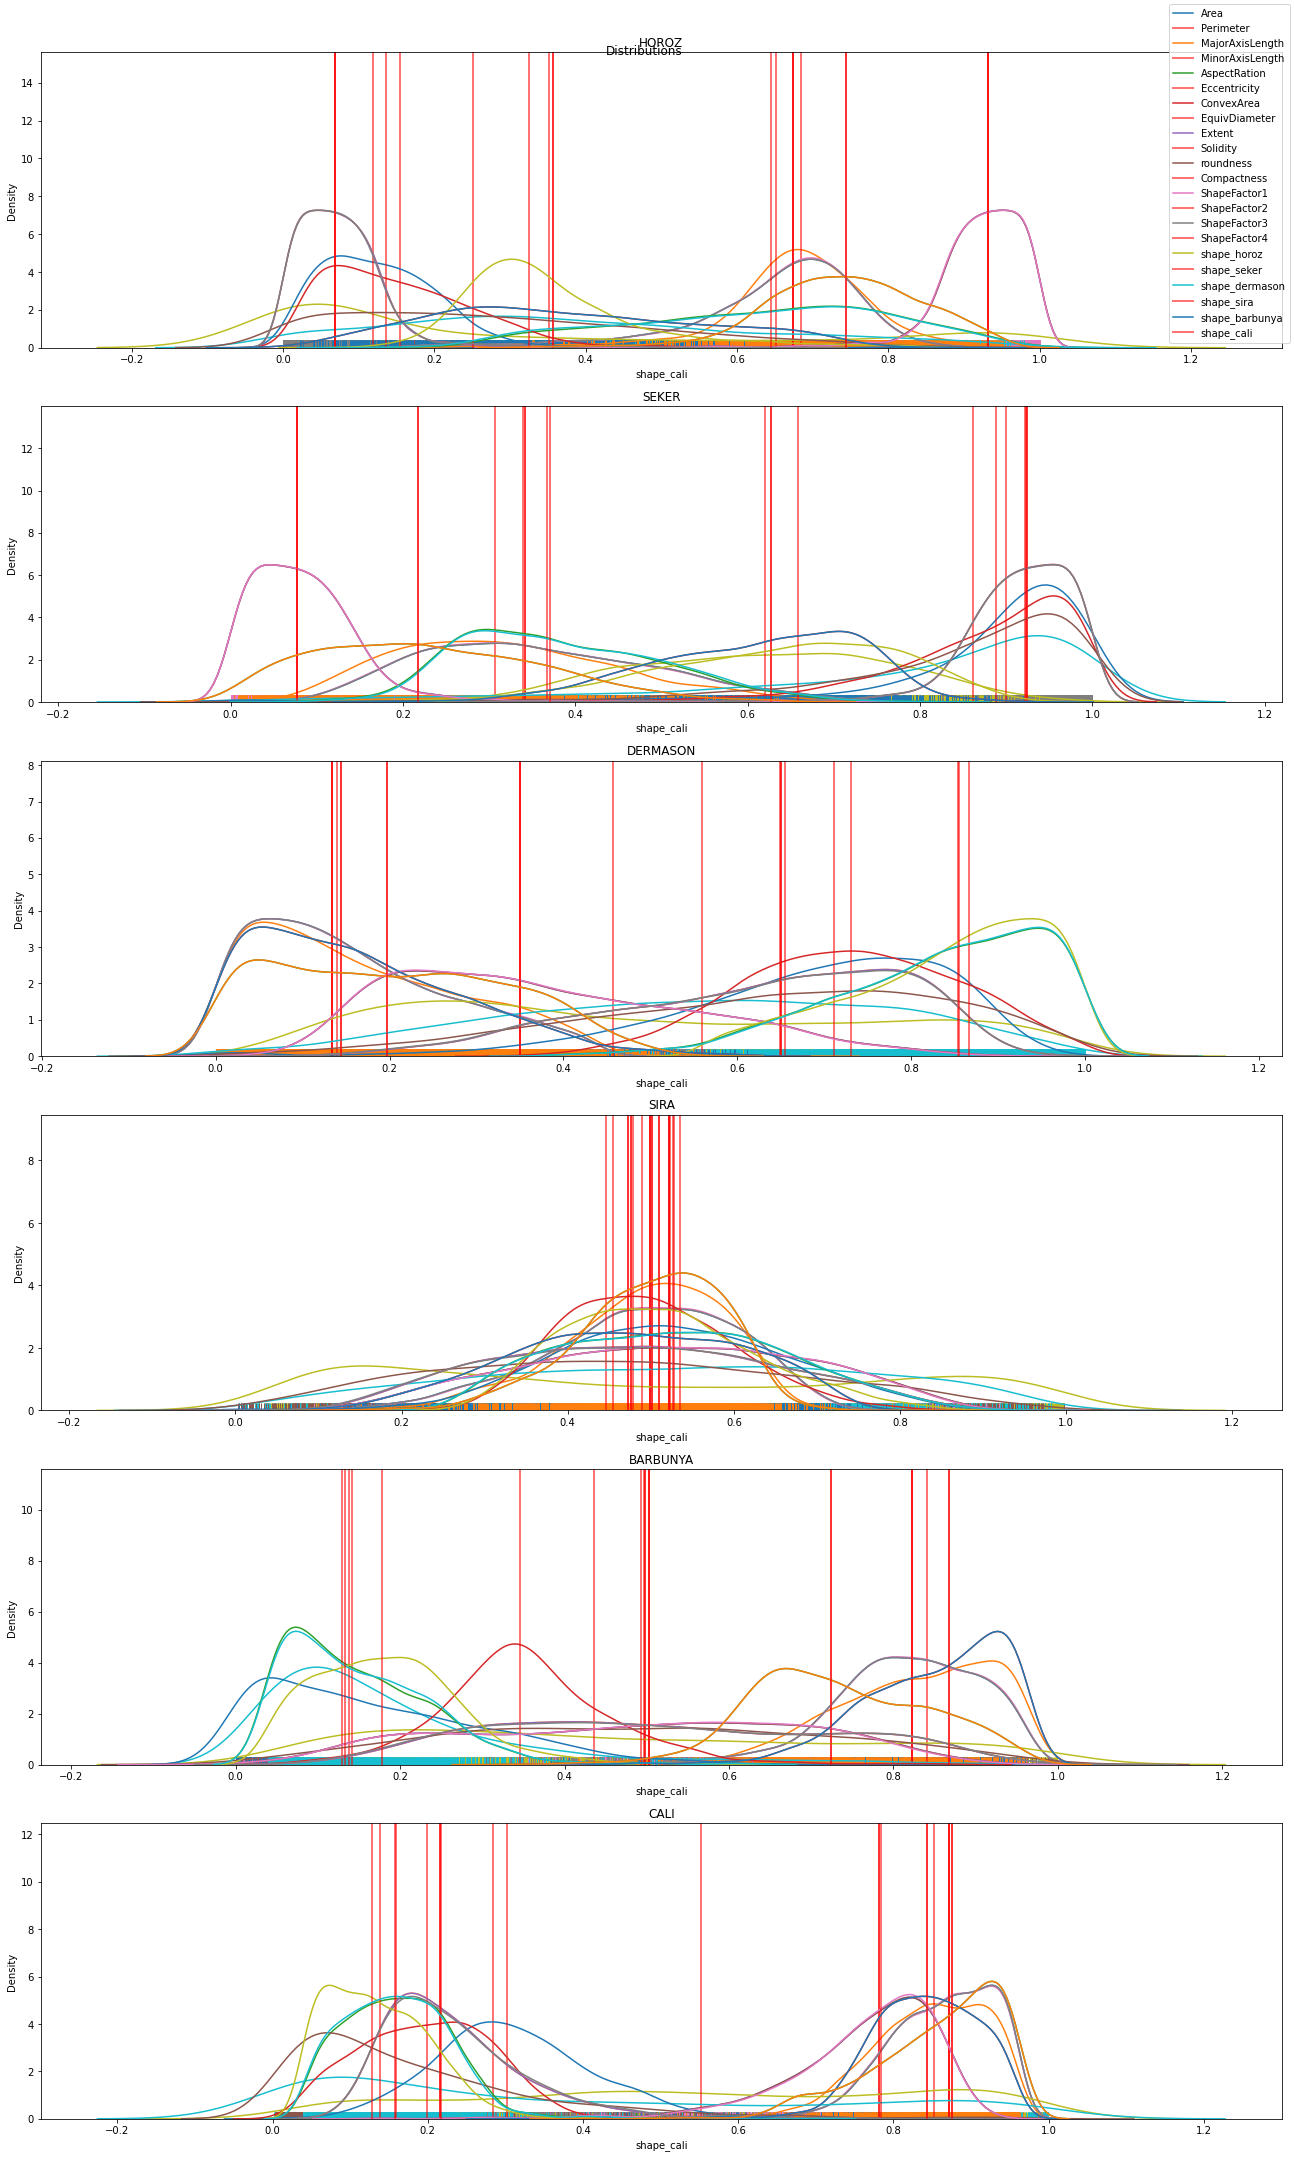

In [20]:
col_1 = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength']
col_2 = ['AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter']
col_3 = ['Extent','Solidity', 'roundness', 'Compactness']
col_4 = ['ShapeFactor1', 'ShapeFactor2','ShapeFactor3', 'ShapeFactor4']
col_5 = ["shape_horoz","shape_seker","shape_dermason","shape_sira" ,"shape_barbunya","shape_cali"]


def feature_distribution(cols):
    classes = ['HOROZ', 'SEKER', 'DERMASON', 'SIRA', 'BARBUNYA', 'CALI']
    fig,axes = plt.subplots(6,int(len(classes)/6),figsize=(18, 30), sharey=False)
    fig.suptitle("Distributions")
#     /=for clas_ in classes:
    all_medians = []
    for i,axe in enumerate(axes.flatten()):
        medians = []
        axe.set_title(classes[i],size= 'large')
        for c in range(len(cols)):
            if(i <= len(classes)):
                sns.distplot( df[df["y"] == classes[i]  ][cols[c]]  ,ax=axe,rug=True , hist=False )
                median = df[df["y"] == classes[i]  ][cols[c]].median()
#                 axe.set_title(classes[i] + f' ,Median : {median:0.1f}',size= 'large')
                axe.axvline(median, color ='red',lw=2, alpha = 0.55)
                medians.append((cols[c],median))
        all_medians.append((classes[i],medians))
    fig.legend(labels= cols)
    plt.tight_layout()
    plt.show() 
    return all_medians
all_medians = feature_distribution(col_1+col_2+col_3+col_4+col_5)

# Training Model

In [21]:
Features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation',  'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
        'ShapeFactor4', 'shape_horoz', 'shape_seker',
       'shape_dermason', 'shape_sira', 'shape_barbunya', 'shape_cali',
       'shape_CALI', 'shape_sira_2','DERM_SIRA']

X =  df[Features]
Y = df['y']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=132)

# $$Precision_{micro} = \frac{\sum_{k \in C} TP_k}{\sum_{k \in C} TP_k + FP_k}$$ $$Recall_{micro} = \frac{\sum_{k \in C} TP_k}{\sum_{k \in C} TP_k + FN_k}$$ 
# F1-score is the harmonic mean of precision and recall 
$$MeanFScore = F1_{micro}= \frac{2 Precision_{micro} Recall_{micro}}{Precision_{micro} + Recall_{micro}}$$

In [22]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier()
model1.fit(x_train, y_train)
# print metric to get performance
print("Accuracy: ",model1.score(x_test, y_test) * 100)
y_pred = model1.predict(x_test)
f1 = f1_score(y_test, y_pred, average='micro')
print("f1_score: ",f1)

Accuracy:  92.8011075219197
f1_score:  0.928011075219197


In [23]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(x_train, y_train)
# print metric to get performance
print("Accuracy: ",model2.score(x_test, y_test) * 100)
y_pred = model2.predict(x_test)
f1 = f1_score(y_test, y_pred, average='micro')
print("f1_score: ",f1)

Accuracy:  89.34010152284264
f1_score:  0.8934010152284264


In [24]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9197046608214121


In [25]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import VotingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC

# log_clf = LogisticRegression(solver="lbfgs", random_state=42)
# rnd_clf = RandomForestClassifier(random_state=42)
# svm_clf = SVC(random_state=42)
# knn_clf = KNeighborsClassifier(n_neighbors=8)
# mlp_clf = MLPClassifier(random_state=42)
# dt_clf  = DecisionTreeClassifier(random_state=42)
# cb_clf  = cb.CatBoostClassifier(loss_function='MultiClass',depth= 2,iterations= 1000,learning_rate= 0.05,  silent=True)
# bag_clf = BaggingClassifier(
#     DecisionTreeClassifier(), n_estimators=1000,
#     max_samples=200, bootstrap=True, random_state=42)

# voting_clf = VotingClassifier(
#     estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf),('knn',knn_clf),('bag',bag_clf),('mlp',mlp_clf)],
#     voting='hard')

In [26]:
# voting_clf.fit(x_train, y_train)

In [27]:
# from sklearn.metrics import accuracy_score

# for clf in (log_clf, rnd_clf, svm_clf,knn_clf,bag_clf,mlp_clf ,voting_clf):
#     clf.fit(x_train, y_train)
#     y_pred = clf.predict(x_test)
#     print(f"{clf}", accuracy_score(y_test, y_pred))
#     f1 = f1_score(y_test, y_pred, average='micro')
#     print("f1_score: ",f1)


In [28]:
# # make a prediction with a stacking ensemble
# from sklearn.datasets import make_classification
# from sklearn.ensemble import StackingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from xgboost import XGBClassifier

# # define the base models
# level0 = list()
# level0.append(('rnd', RandomForestClassifier(random_state=42)))
# level0.append(('cat', cb.CatBoostClassifier(loss_function='MultiClass',depth= 2,iterations= 1000,learning_rate= 0.05,  silent=True)))
# level0.append(('cart', DecisionTreeClassifier(random_state=42)))
# level0.append(('svm', SVC(random_state=42,C= 5, gamma= 0.1, kernel= 'rbf',probability=True)))
# level0.append(('bag', BaggingClassifier(DecisionTreeClassifier(), n_estimators=1000,max_samples=200, bootstrap=True, random_state=42)))
# level0.append(('mlp', MLPClassifier(random_state=42)))
# level0.append(('knn', KNeighborsClassifier(n_neighbors=8)))
# level0.append(('xgb', XGBClassifier()))
# # define meta learner model
# level1 = cb.CatBoostClassifier(iterations=1500,  learning_rate=0.05, verbose=0)
# # define the stacking ensemble
# model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10)
# # fit the model on all available data
# model.fit(x_train, y_train)
# # make a prediction for one example
# y_pred = model.predict(x_test)
# f1 = f1_score(y_test, y_pred, average='micro')
# print("f1_score: ",f1)

In [29]:
model = cb.CatBoostClassifier(loss_function='MultiClass',depth=2,iterations= 1000,
                    learning_rate= 0.05,l2_leaf_reg=0.002, silent=True)
model.fit(x_train, y_train)
y_predcb = model.predict(x_test)
print("Accuracy: ",model.score(x_test, y_test) * 100)
f1 = f1_score(y_test, y_predcb, average='micro')
print("f1_score: ",f1)

Accuracy:  93.72404245500692
f1_score:  0.9372404245500692


# Test Dataset

In [30]:
df_test = pd.read_csv(test_path)
df_test.head()
processing(df_test)

In [31]:
X_test =  df_test[Features]
pred = model.predict(X_test)

# add y column to the test data
df_test['y'] = pred

df_test.head()

ID      Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  10834  0.711760   0.719610         0.791184         0.568637      0.897827   
1  10835  0.076768   0.076073         0.086021         0.096588      0.279118   
2  10836  0.686341   0.667362         0.548770         0.788981      0.176802   
3  10837  0.015937   0.012464         0.018119         0.025358      0.292200   
4  10838  0.967014   0.966632         0.966770         0.970389      0.426511   

   Eccentricity  ConvexArea  EquivDiameter    Extent  ...  shape_seker  \
0      0.897827    0.728406       0.711760  0.023914  ...     0.097797   
1      0.279118    0.076589       0.076768  0.569556  ...     0.721674   
2      0.176802    0.690509       0.686341  0.460165  ...     0.822805   
3      0.292200    0.015754       0.015937  0.238819  ...     0.709753   
4      0.426511    0.966955       0.967015  0.904804  ...     0.570125   

   shape_dermason  shape_sira  shape_barbunya  shape_cali  shape_CALI  \
0        0.288260    0.435389        0.568636    0.791256    0.854636   
1        0.923144    0.902482        0.096589    0.086019    0.153109   
2        0.313323    0.210867        0.788981    0.548765    0.422520   
3        0.984054    0.974659        0.025359    0.018118    0.088968   
4        0.032986    0.029565        0.970389    0.966770    0.957839   

   shape_CALI_2  shape_sira_2  DERM_SIRA         y  
0      0.904870      0.650659   0.875964     HOROZ  
1      0.278001      0.094745   0.071061  DERMASON  
2      0.177193      0.786034   0.675048  BARBUNYA  
3      0.289231      0.024243   0.012139  DERMASON  
4      0.431947      0.970999   0.967841    BOMBAY  

[5 rows x 28 columns]

In [32]:
df_test[['ID', 'y']].to_csv('/kaggle/working/submission.csv', index=False)